<a href="https://colab.research.google.com/github/martynwheeler/MartynsBinders/blob/main/NuclearData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nuclear Calculations

This notebook can be used for all types of nuclear calculations.  It uses the [AME2016](https://www-nds.iaea.org/amdc/) dataset for accurate mass values.

## Getting started

The first thing to do is to run the cell directly below this one to load the data from the server.

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks')

In [3]:
from NuclearData import NuclearData
nd = NuclearData(accurate=False)

Now that the data is in the notebook you can use it to perform calcuations.  I have used the physical constants in the [OCR Physics A databook](https://www.ocr.org.uk/Images/363796-units-h156-and-h556-data-formulae-and-relationships-booklet.pdf).  However, if you want to be super accurate you can rerun the cell above with the option:  

```
nd = NuclearData(accurate=True)
```

You can see the constants at any time by running the cell below.

In [4]:
nd.printConstants()

----------------------------------------------------
Quantity                            Value         
----------------------------------------------------
AMU                                 1.661e-27     
mass of electron /u                 5.485e-04     
mass of proton / u                  1.0072        
mass of neutron / u                 1.0084        
speed of light / m/s                3.00e+08      
electron charge / C                 1.60e-19      
amu to MeV                          934.313       
----------------------------------------------------


## Getting nuclear data

To see the data for a particular atom just enter the A and Z values as in the next cell and press run. 

In [5]:
nd.printTable(A=4, Z=2)

----------------------------------------------------
Quantity                            Value         
----------------------------------------------------
Element                             He            
Proton Number                       2             
Nucleon Number                      4             
Neutron Number                      2             
Atomic Mass / u                     4.00260325    
Nuclear Mass / u                    4.00150625    
Mass Defect / u                     0.02969375    
Binding Energy / MeV                27.74323794   
Binding Energy per Nucleon / MeV    6.93580948    
----------------------------------------------------


You can show the binding energy per nucleon from the data set and the total binding energy.

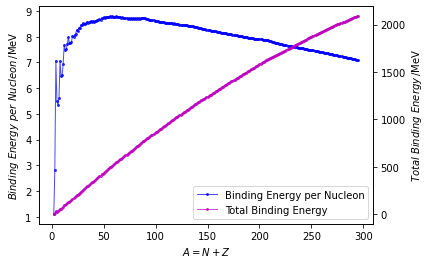

In [6]:
nd.printGraph()

Here's some more data, this time for Thorium-228

In [7]:
nd.printTable(A=228, Z=90)

----------------------------------------------------
Quantity                            Value         
----------------------------------------------------
Element                             Th            
Proton Number                       90            
Nucleon Number                      228           
Neutron Number                      138           
Atomic Mass / u                     228.02873984  
Nuclear Mass / u                    227.97937484  
Mass Defect / u                     1.82782517    
Binding Energy / MeV                1707.75989947 
Binding Energy per Nucleon / MeV    7.49017500    
----------------------------------------------------


## Nuclear decay energies

You can also calculate alpha and beta decay energies.  Here's the energy released by the decay of Thorium-228 and Bismuth-210.

In [8]:
nd.printAlphaEnergyReleaseMeV(A=228, Z=90)

Energy Release (MeV) = -5.5369       


In [9]:
nd.printBetaEnergyReleaseMeV(A=210, Z=83)

Energy Release (MeV) = -1.1647       


It will calculate the alpha particle energy and speed too.

In [10]:
nd.printAlphaEnergyMeV(A=228, Z=90)

Alpha KE (MeV) = 5.4397        


In [11]:
nd.printAlphaEnergyJ(A=228, Z=90)

Alpha KE (J) = 8.7035e-13    


In [12]:
nd.printAlphaSpeed(A=228, Z=90)

Alpha Speed (m/s) = 1.6183e+07    


For beta particles the speed has to be calculated from relativistic equations, so this might not be one to get pupils to do.


In [13]:
nd.printBetaEnergyMeV(A=210, Z=83)

Beta KE (MeV) =  1.1647        


In [14]:
nd.printBetaSpeed(A=210, Z=83)

Beta Speed (m/s) =  2.8565e+08    


I have not documented all of the functions but the source can be found [Here](https://github.com/martynwheeler/MartynsBinders/blob/main/Nuclear/NuclearData.py).  I will add some more documentation when I have time.

## Fission Reaction Example

Induced fission of Uranium-235 into Krypton-90 + Barium-144 and two neutrons

First, do it with atomic masses:

In [15]:
deltam = (nd.getAtomicMassAMU(90,36) + nd.getAtomicMassAMU(144,56) + 2 * nd.NEUTRONMASS) - (nd.getAtomicMassAMU(235,92) + nd.NEUTRONMASS)
deltam * nd.AMUTOKEV / 1000

-180.36476672568963

Now with binding energies:

In [16]:
nd.getBindingEnergyMEV(235,92) - (nd.getBindingEnergyMEV(90,36) + nd.getBindingEnergyMEV(144,56))


-180.36476672566323

## Fusion Reaction Example

Induced fusion of four protons to form Helium-4 

In [17]:
deltam = (nd.getNuclearMassAMU(4,2) + 2 * nd.ELECTRONMASS) - (4 * nd.PROTONMASS)
deltam * nd.AMUTOKEV / 1000

-24.475947125664465

In [18]:
nd.printTable(A=229, Z=88)

----------------------------------------------------
Quantity                            Value         
----------------------------------------------------
Element                             Ra            
Proton Number                       88            
Nucleon Number                      229           
Neutron Number                      141           
Atomic Mass / u                     229.03495671  
Nuclear Mass / u                    228.98668871  
Mass Defect / u                     1.83131129    
Binding Energy / MeV                1711.01703244 
Binding Energy per Nucleon / MeV    7.47169010    
----------------------------------------------------
